# Fat Tails & Central Limit Theorem

The central limit theorem applies to data sampled from fat-tailed distributions so long as the second moment is finite, but the question is "how soon".

For data sampled from a normal distribution (the least fat-tailed!), the mean of a sample of $1$ already has normal distribution with standard deviation $\sigma_\mu = \sigma/\sqrt{n}$.

For fat tailed distributions, the required sample size can be much larger. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def get_variances(distribution):
    
    N_TRIALS = 1000
    MAX_SAMPLE_SIZE = 10000
    
    sample_sizes = np.array(list(range(1,MAX_SAMPLE_SIZE+1)))[::50]
    variances = []
    
    for sample_size in sample_sizes:
        if sample_size % 100 == 1:
            print("%i/%i" % (sample_size,MAX_SAMPLE_SIZE),end='\r')
        trials = []
        for trial in range(N_TRIALS):
            trials.append(np.mean(distribution(size=sample_size)))
        variances.append(np.var(trials))
        
    return sample_sizes, variances
    
    
def standard_t(df):
    
    def f(size):
        return np.random.standard_t(df=df,size=size)
    
    return f


dof = 1               
dof = 2               
dof = 3               
dof = 4               
dof = 5               
dof = 10               
dof = 50               
dof = 1000               


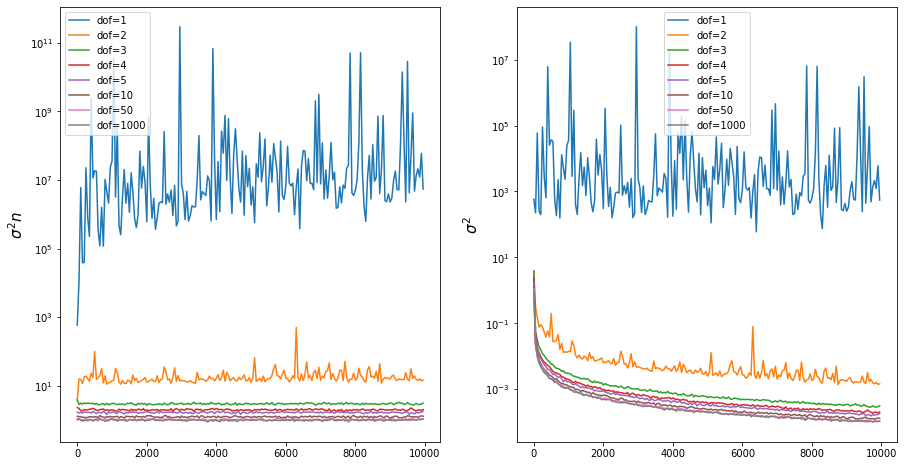

In [2]:
dofs = [1,2,3,4,5,10,50,1000]#,10,50,100,1000]

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for dof in dofs:
    print("dof = %i               " % dof)

    sample_size, variances = get_variances(standard_t(dof))
    
    ax1.semilogy(sample_size,variances*sample_size)
    ax1.set_ylabel('$\sigma^2 n$',fontsize=15)
    
    ax2.semilogy(sample_size,variances)
    ax2.set_ylabel('$\sigma^2$',fontsize=15)
    


ax1.legend(['dof=%i' % dof for dof in dofs])
ax2.legend(['dof=%i' % dof for dof in dofs])
plt.savefig('img/fattailsstudentt01.png',bbox_inches="tight")

Text(0.5, 24.0, 'n samples')

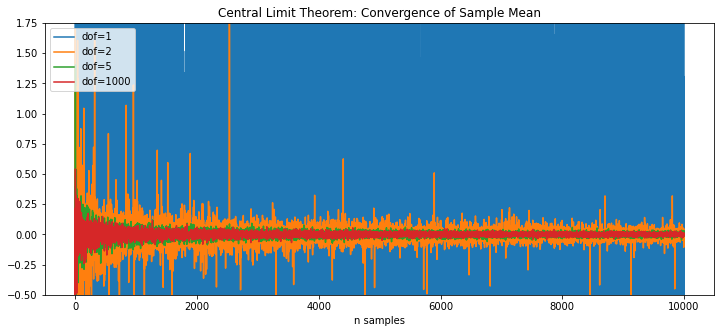

In [3]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

dofs = [1,2,5,1000]
for i,dof in enumerate(dofs):
    sample_sizes = np.array(list(range(1,10000)))
    means = []
    for sample_size in sample_sizes:
        means.append(np.mean(standard_t(dof)(size=sample_size)))

    ax.plot(sample_sizes,np.array(means)-i*0,alpha=1.0)
    
    
ax.set_ylim(-0.5,1.75)   
ax.legend(["dof=%i" % dof for dof in dofs])
ax.set_title('Central Limit Theorem: Convergence of Sample Mean')
plt.savefig('img/fattailstudentt02.png',bbox_inches="tight")
ax.set_xlabel('n samples')